Name: Aslesa Lamsal       
University id: 2407798


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Data Exploration and Understanding:

• Dataset Overview:

Load the dataset and display the first 10 rows.
Identify the number of rows and columns in the dataset.
List all the columns and their data types.

In [34]:
#loads the dataset
df=pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")
#displaying the first 10 rows
print("The first 10 rows : \n ",df.head(10))
#identifying number of rows and column
#df.shape returns bot number of rows and column
rowsNum=df.shape[0]
print("The number of rows in dataset are : \n ",rowsNum)
columnNum=df.shape[1]
print("The number of columns in dataset are : \n ",columnNum)
#listing all the columns and their data types
dataTypes=df.dtypes
print("Thge name of allthe columns and their data types :\n",dataTypes)


The first 10 rows : 
    Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                

Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [35]:
#Calculating mean of score column
meanForScore=df['score'].mean()
print("The mean for the score column is :\n",meanForScore)
#Calculating mean of score column
medianForScore=df['score'].median()
print("The median for the score column is :\n",medianForScore)
#Calculating mean of score column
standardDeviation=df['score'].std()
print("The standard deviation for the score column is :\n",standardDeviation,"\n")

highestScore=df.loc[df["score"].idxmax()]
print("The country with highest happiness score is :",highestScore['Country name'])

lowestScore=df.loc[df["score"].idxmin()]
print("The country with lowest happiness score is :",lowestScore['Country name'])

The mean for the score column is :
 5.52758041958042
The median for the score column is :
 5.785
The standard deviation for the score column is :
 1.1707165099442995 

The country with highest happiness score is : Finland
The country with lowest happiness score is : Afghanistan


• Missing Values:

Check if there are any missing values in the dataset. If so, display the total count for each column.

In [36]:
#Checking missing values using .isnull
missingValues=df.isnull().sum()
#there are some missing values so counting missing values for each column
count=missingValues[missingValues>0]

print("The total count of missing values in each column are  :\n",count)

The total count of missing values in each column are  :
 Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:

Filter the dataset to show only the countries with a Score greater than 7.5.
For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [37]:
#filtering the dataset to show only the countries with score greater than 7.5
filteredDataset=df[df['score']>7.5]
print("The countries with a score greater tha 7.5 are :\n",filteredDataset)
#sorting the dataset by GDP per Capita in descending order
sortedDataset=filteredDataset.sort_values(by='Log GDP per capita', ascending=False)
#Displaying the top 10 rows
print("The top 10 rows are :\n",sortedDataset.head(10))

The countries with a score greater tha 7.5 are :
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
The top 10 rows are :
   Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0 


Adding New Columns:

Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
Low − (Score < 4) Medium − (4 ≤ Score ≤ 6) High − (Score > 6)

In [62]:
#Creating new column Happiness Category
#in this column according to their score the row is filled with high, low and medium
df['Happiness Category']=df['score'].map(lambda x:'Low' if x<4 else('Medium' if 4<=x<=6 else 'High'))
print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

2. Data Visualizations:
Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

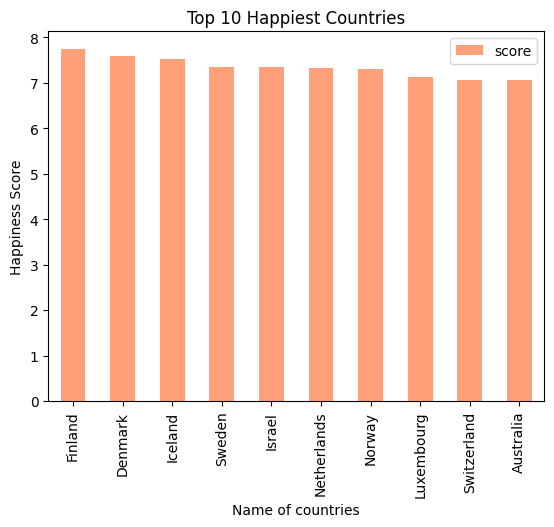

In [39]:
happiestCountries10=df.nlargest(10,'score')
happiestCountries10.plot(kind='bar',x='Country name',y='score',color="#FFA07A",width=0.5)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Name of countries')
plt.ylabel('Happiness Score')
plt.show()

Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

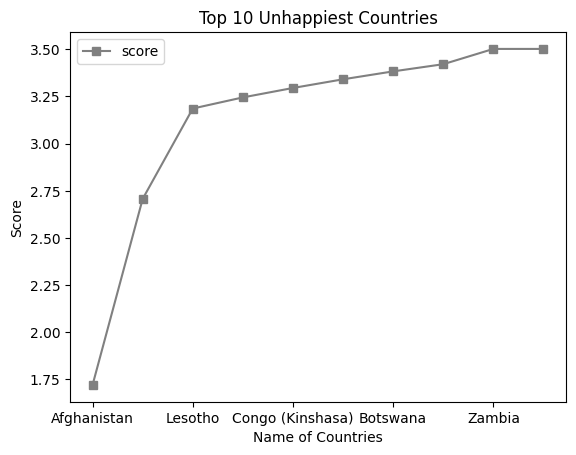

In [40]:
lowesttCountries10=df.nsmallest(10,'score')
lowesttCountries10.plot(kind='line',x='Country name',y='score',marker='s',color="grey")
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Name of Countries')
plt.ylabel('Score')
#show the plot
plt.show()

Plot a histogram for the Score column to show its distribution and also interpret.

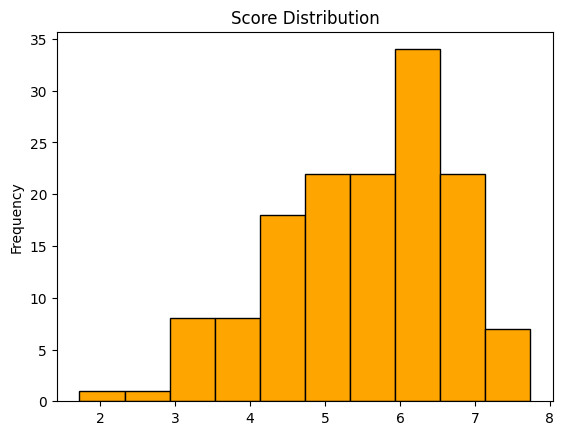

In [41]:
scoreC=df['score']
scoreC.plot(kind='hist',color='orange',edgecolor='black')
plt.title('Score Distribution')
plt.show()

It is unimodal histogram because the data has a single peak. The happiness score of most of the countries have a score in central value but some have either hign or low score

Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

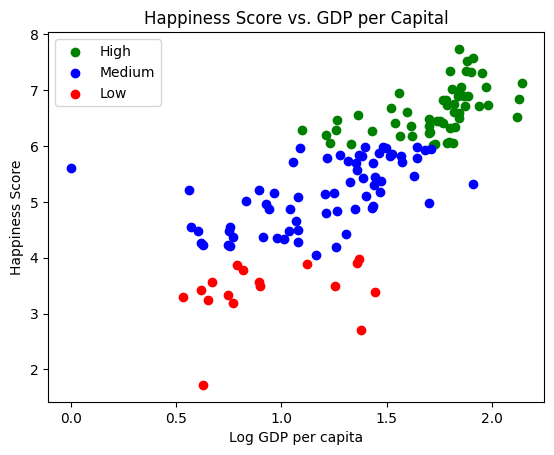

In [63]:
categories = df['Happiness Category'].unique()
colors = {'Low':'red', 'Medium':'blue','High':'green'}
for category in categories:
  category_data = df[df['Happiness Category'] == category]
  plt.scatter(category_data['Log GDP per capita'],category_data['score'],label = category, color = colors[category])

plt.title('Happiness Score vs. GDP per Capital')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset: Steps:

Define the countries in South Asia with a list for example: south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

1.Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
2.Save the filtered dataframe as separate CSV files for future use.

In [43]:
south_asian_countries=["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan","Sri Lanka"]
df=pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")
filteredCountries=df[df['Country name'].isin(south_asian_countries)]
filteredCountries.to_csv('south_asian_countries.csv', index=False)
print("Filtered countries is saved in seperate csv file")

Filtered countries is saved in seperate csv file


Task - 2 - Composite Score Ranking: Tasks:

Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

0.30 × Healthy Life Expectancy
Rank the South Asian countries based on the Composite Score in descending order.

In [44]:
newdf=pd.read_csv('/content/south_asian_countries.csv')
newdf['Composite Score'] = 0.40 * newdf['Log GDP per capita'] + 0.30 * newdf['Social support'] + 0.30 * newdf['Healthy life expectancy']
rankCountries=newdf.sort_values(by='Composite Score', ascending=False)
rankCountries.head(6)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

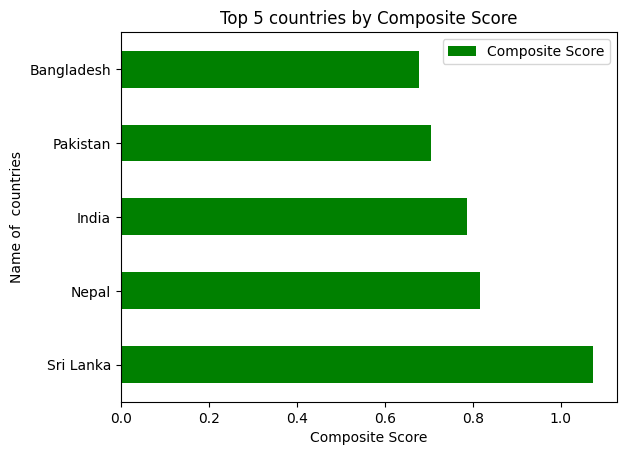

In [45]:
topCountries=rankCountries.head(5)
topCountries.plot(kind='barh',x='Country name',y='Composite Score',color='green')
plt.title('Top 5 countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Name of  countries')
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

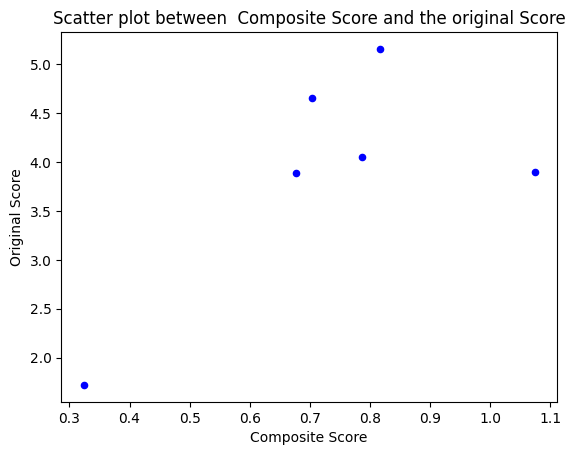

In [46]:
scatter=newdf[['Composite Score','score']]
scatter.plot(x='Composite Score',y='score',kind='scatter',color='blue')
plt.title('Scatter plot between  Composite Score and the original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.show()

The composite score for top 5 countries in descending order i.e highest to lowest : 1.Srilanka 2.Nepal 3.India 4.Pakistan 5.Bangladesh Whereas when we aligned original score in descending order: 1.Nepal 2.Pakistan 3.India 4.Sri Lanka 5.BAngladesh Here,in the composite score Srilanka has highest score but Nepal has highest original score So,the ranking based on composite score doesnot align with original score

Task - 3 - Outlier Detection:

Tasks:

1.Identify outlier countries in South Asia based on their Score and GDP per Capita.
2.Define outliers using the 1.5 × IQR rule.
3.Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
4.Discuss the characteristics of these outliers and their potential impact on regional averages.

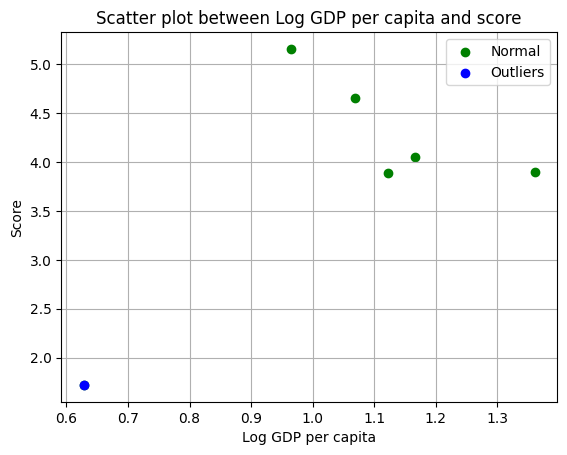

In [47]:
#first and third quartile for score
Q1=newdf['score'].quantile(0.25)
Q3=newdf['score'].quantile(0.75)
#InterQuartile for score
IQR_S=Q3-Q1
#first and third quartile for GDP per capita
Q1_gdp=newdf['Log GDP per capita'].quantile(0.25)
Q3_gdp=newdf['Log GDP per capita'].quantile(0.75)
#Interquartile for GDP per capita
IQR_gdp=Q3_gdp-Q1_gdp
#to find outliers looking for data points that fall on bounds for score
lowerBoundScore=Q1-1.5*IQR_S
upperBoundScore=Q3+1.5*IQR_S
#to find outliers looking for data points that fall on bounds for GDP per capita
lowerBoundGDP=Q1_gdp-1.5*IQR_gdp
upperBoundGDP=Q3_gdp+1.5*IQR_gdp

#Identifying outliers
outliersOfScore=newdf[(newdf['score']<lowerBoundScore) | (newdf['score']>upperBoundScore)]
outliersOfGDP=newdf[(newdf['Log GDP per capita']<lowerBoundGDP) | (newdf['Log GDP per capita']>upperBoundGDP)]
#Combining outliers
outliers=pd.concat([outliersOfScore,outliersOfGDP]).drop_duplicates()
#PLOT
plt.scatter(newdf['Log GDP per capita'],newdf['score'],color='green',label='Normal')
plt.scatter(outliers['Log GDP per capita'],outliers['score'],color='blue',label='Outliers')
plt.title('Scatter plot between Log GDP per capita and score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

From the above scatter plot we can see that outliers has logg GDP per capita around 0.63 where score is below 2.0.in general, the normal points have higher values than 0.63 are score above 5.0 it shows that it indicate the lower happiness. Potential Imapcat on Regional averages Mean of score When a outlier with score is below 2.0 while normal points are around 5.0 it can reduce the mean score of the region

Task - 4 - Exploring Trends Across Metrics:

Tasks:

1.Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
2.Create scatter plots with trendlines for these metrics against the Score.
3.Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

In [48]:
#Calculating correlation
firstMetrices=newdf['Freedom to make life choices'].corr(newdf['score'])
secondMetrices=newdf['Generosity'].corr(newdf['score'])
print("The correlation between Freedom to make life choices and score is :\n",firstMetrices)
print("The correlation between Generosity and score is :\n",secondMetrices)

The correlation between Freedom to make life choices and score is :
 0.8005185224163315
The correlation between Generosity and score is :
 0.874512371253192


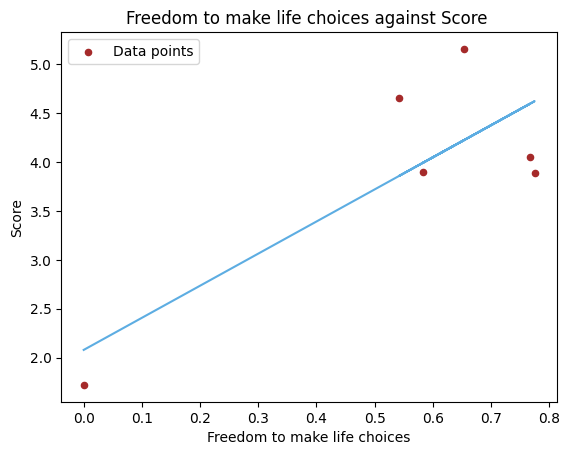

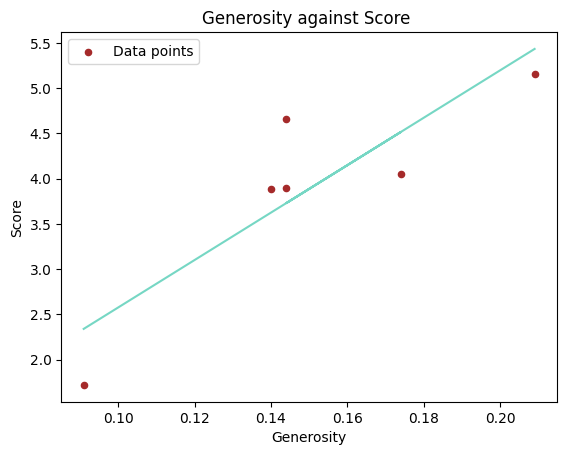

In [49]:
#Scatter plot with trendlines for two matrices against the score
sPlot=newdf[['Freedom to make life choices','score']]
sPlot.plot(kind='scatter',color='brown',x='Freedom to make life choices',y='score',label='Data points')
plt.title('Freedom to make life choices against Score ')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
#trendline helps to visualize the relation between two variables
z=np.polyfit(sPlot['Freedom to make life choices'],sPlot['score'],1)
p=np.poly1d(z)
plt.plot(sPlot['Freedom to make life choices'],p(sPlot['Freedom to make life choices']),color='#5dade2',label='Trendline')
#Scatter plot for Generosity
sPlotG=newdf[['Generosity','score']]
sPlotG.plot(kind='scatter',color='brown',x='Generosity',y='score',label='Data points')
plt.title('Generosity against Score ')
plt.xlabel('Generosity')
plt.ylabel('Score')
#trendline helps to visualize the relation between two variables
zG=np.polyfit(sPlotG['Generosity'],sPlotG['score'],1)
pG=np.poly1d(zG)
plt.plot(sPlotG['Generosity'],pG(sPlotG['Generosity']),color='#76d7c4',label='Trendline')

plt.show()

Correlation helps to find the strongest and weakest relation between Freedom to make life choices against score and generosity against score. As, from above corelation we can see that correlation of freedom to make life choices against score is 0.800 and generosity against score is 0.8754. both freedom to make life choices and generosity against score have comparitively same correlation.In this case there is no weakest cause their correlation doent have much difference. Freedom to make life choices is strongest and generosity is stronger.

Task - 5 - Gap Analysis:

Tasks:

1.Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
2.Rank the South Asian countries by this gap in both ascending and descending order.
3.Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4.Analyze the reasons behind these gaps and their implications for South Asian countries.

0          Nepal
1       Pakistan
2          India
4     Bangladesh
3      Sri Lanka
5    Afghanistan
Name: Country name, dtype: object
  Country name  score  Log GDP per capita  Social support  \
5  Afghanistan  1.721               0.628           0.000   
3    Sri Lanka  3.898               1.361           1.179   
4   Bangladesh  3.886               1.122           0.249   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
0        Nepal  5.158               0.965           0.990   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
5                    0.242                         0.000       0.091   
3                    0.586                         0.583       0.144   
4                    0.513                         0.775       0.140   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
0   

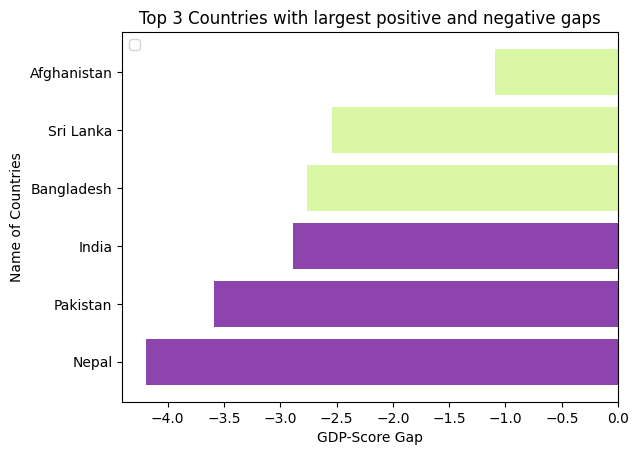

In [50]:
#adding new column in dataset called GDP-Score Gap
newdf['GDP-Score Gap']=newdf['Log GDP per capita']-newdf['score']
#Ranking south asian countries in ascending order
rankAscendingOrder=newdf.sort_values(by='GDP-Score Gap', ascending=True)
#Ranking south asian countries in descending order
rankDescendingOrder=newdf.sort_values(by='GDP-Score Gap', ascending=False)
print(rankAscendingOrder['Country name'])
print(rankDescendingOrder)
#top 3 countries with largest positive gaps
#.nlargest give largest positive gaps
largestP=newdf.nlargest(3,'GDP-Score Gap')
print("3 Largest positive gap\n",largestP)
#top 3 countries with largest negative gaps
largestN=newdf.nsmallest(3,'GDP-Score Gap')
print("3 Largest negative gap\n",largestN)
# plotting the largest and positive gaps using bar chart
#to plot them weshould first concat them and store in variable
c=pd.concat([largestP,largestN]).sort_values(by='GDP-Score Gap')
plt.barh(c['Country name'],c['GDP-Score Gap'],color=['#8e44ad'if gap < 3 else '#DAF7A6' for gap in range(0,6)])
plt.title('Top 3 Countries with largest positive and negative gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Name of Countries')
plt.legend()
plt.show()

There are three top negative countries having negative gap which are Nepal, PAkistan,India. These three countries have high score but have lower Log GDP per capita.

Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list: middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [51]:
middle_east_countries=["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait","Lebanon","Oman","State of Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]
df=pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")
mec=df[df['Country name'].isin(middle_east_countries)]

mec.to_csv('middle_east_countries.csv', index=False)
print("Middle east countries is saved in seperate csv file")

Middle east countries is saved in seperate csv file


Descriptive Statistics: • Calculate the mean, Standard deviation of the score for both South Asia and Middle East. • Which region has higher happiness Scores on average?

In [52]:
#mean and standard deviation for south asia countries
meanSouthAsia=filteredCountries['score'].mean()
stdSouthAsia=filteredCountries['score'].std()
#mean and standard deviation for middle east countries
meanMiddleEast=mec['score'].mean()
stdMiddleEast=mec['score'].std()
print("Mean of South AsianCountries",meanSouthAsia)
print("STD of South AsianCountries",stdSouthAsia)
print("Mean of Middle East Countries",meanMiddleEast)
print("STD of Middle East Countries",stdMiddleEast)

Mean of South AsianCountries 3.895666666666667
STD of South AsianCountries 1.1770690152521504
Mean of Middle East Countries 5.363636363636363
STD of Middle East Countries 1.4944977265106343


The mean of Middle east countries is higher than south asian countries.So,Middle east region has higher happiness

2. Top and Bottom Performers: • Identify the top 3 and bottom 3 countries in each region based on the score. • Plot bar charts comparing these charts.

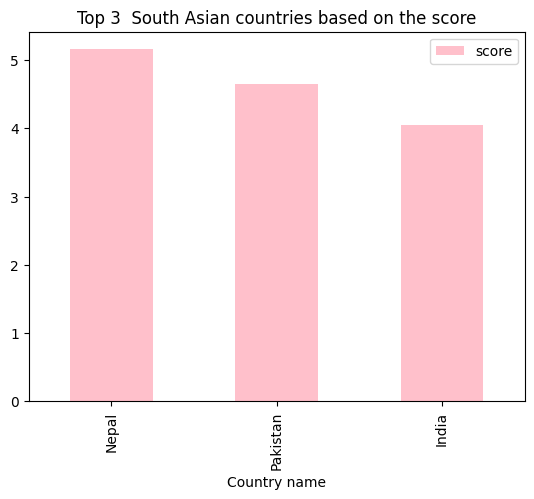

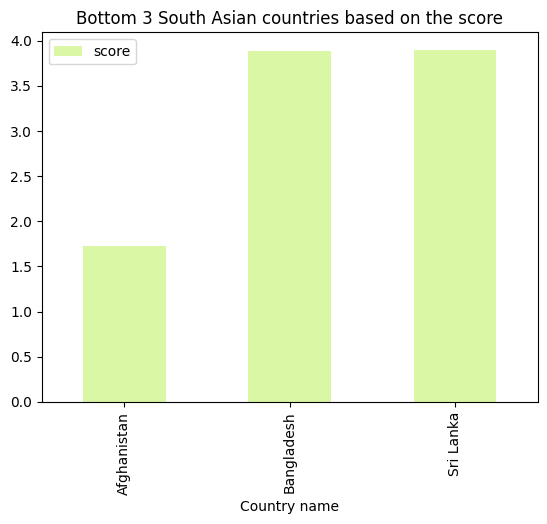

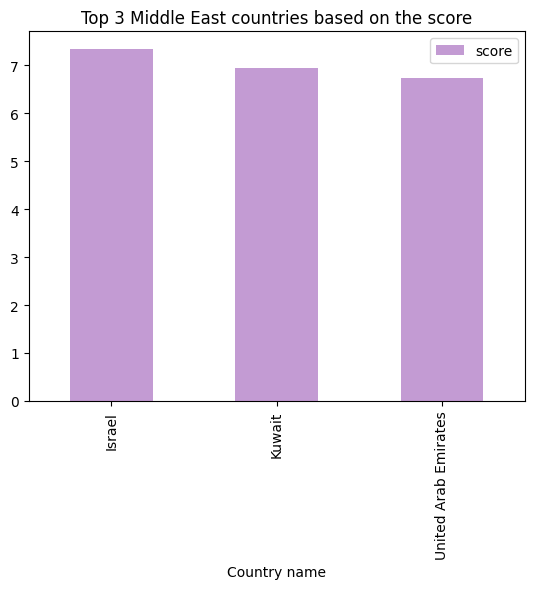

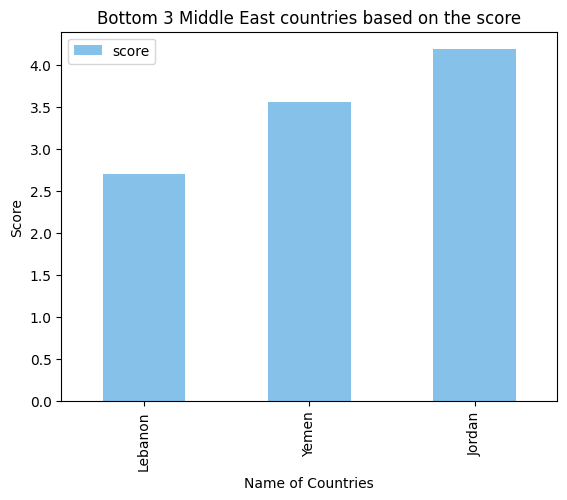

In [53]:
#Identifying top 3 countries in each region
top3M=mec.nlargest(3,'score')
bottom3M=mec.nsmallest(3,'score')
top3S=newdf.nlargest(3,'score')
bottom3S=newdf.nsmallest(3,'score')

top3S.plot(kind ='bar',x ='Country name',y ='score' , color ='pink',)
plt.title("Top 3  South Asian countries based on the score")
bottom3S.plot(kind ='bar',x ='Country name',y ='score', color ='#DAF7A6')
plt.title('Bottom 3 South Asian countries based on the score')
top3M.plot(kind ='bar',x ='Country name',y ='score' , color ='#c39bd3')
plt.title('Top 3 Middle East countries based on the score')
bottom3M.plot(kind ='bar',x ='Country name',y ='score',color ='#85c1e9')
plt.title('Bottom 3 Middle East countries based on the score')

# giving X and Y labels
plt.xlabel('Name of Countries')
plt.ylabel('Score')

plt.show ()

Metric Comparisons: • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts. • Which metrics show the largest disparity between the two regions?

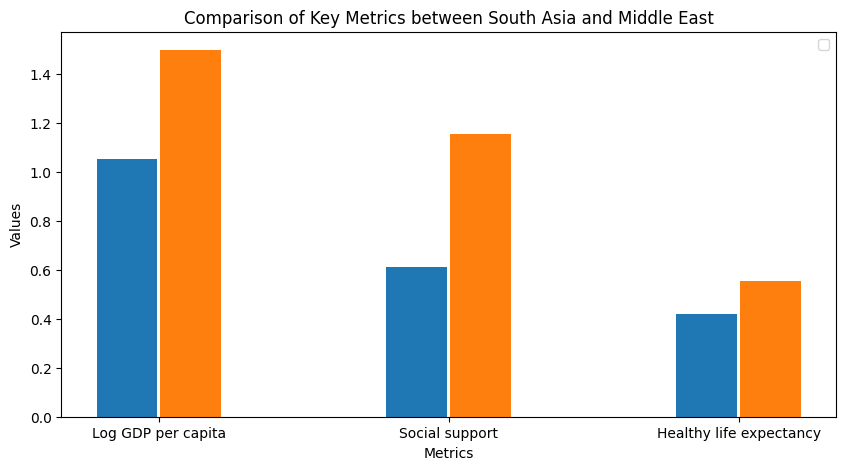

In [54]:
metrics=['Log GDP per capita','Social support','Healthy life expectancy']

#calculating mean for south asia and middle east
metric_mean_for_SA=newdf[metrics].mean()
metric_mean_for_ME=mec[metrics].mean()
x=np.arange(len(metrics))
plt.figure(figsize = (10,5))
width=0.21
plt.bar(x - 0.11, metric_mean_for_SA, width)
plt.bar(x + 0.11, metric_mean_for_ME, width)
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xlabel('Metrics')
plt.ylabel('Values')
#Set x-axis tick positions and labels
plt.xticks(ticks=x, labels=metrics)
plt.legend()
plt.show()


Happiness Disparity: • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions. • Which region has greater variability in happiness?

In [55]:
rangeS=newdf['score'].max()-newdf['score'].min()
cvS=stdSouthAsia/meanSouthAsia
print("The range for score in South asian countries is ",rangeS)
print("Coeffiecient Of Variation",cvS)
rangeM=mec['score'].max()-mec['score'].min()
cvM=stdMiddleEast/meanMiddleEast
print("The range for score in Middle east countries is ",rangeM)
print("Coeffiecient Of Variation",cvM)

The range for score in South asian countries is  3.4370000000000003
Coeffiecient Of Variation 0.3021482883337427
The range for score in Middle east countries is  4.634
Coeffiecient Of Variation 0.2786351693494403


We can determine variablity of happiness through cofficient of variation. In this case South asian countries has higher coefficient of variation so,it has greater variabilty in happiness rather than middle east countries.

Correlation Analysis: • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region. • Create scatter plots to visualize and interpret the relationships

In [56]:
correlationM=mec['Freedom to make life choices'].corr(mec['score'])
correlationS=filteredCountries['Freedom to make life choices'].corr(filteredCountries['score'])
print("The correlation between Freedom to make life choices and score in middle east countries  is :\n",correlationM)
print("The correlation between Freedom to make life choices and score in south asian countries  is :\n",correlationS)
correlationMgenerosity=mec['Generosity'].corr(mec['score'])
correlationSgenerosity=filteredCountries['Generosity'].corr(filteredCountries['score'])
print("The correlation between Generosity and score in middle east countries  is :\n",correlationMgenerosity)
print("The correlation between Generosity and score in south asian countries  is :\n",correlationSgenerosity)

The correlation between Freedom to make life choices and score in middle east countries  is :
 0.8632202433827543
The correlation between Freedom to make life choices and score in south asian countries  is :
 0.8005185224163315
The correlation between Generosity and score in middle east countries  is :
 0.6275236536964182
The correlation between Generosity and score in south asian countries  is :
 0.874512371253192


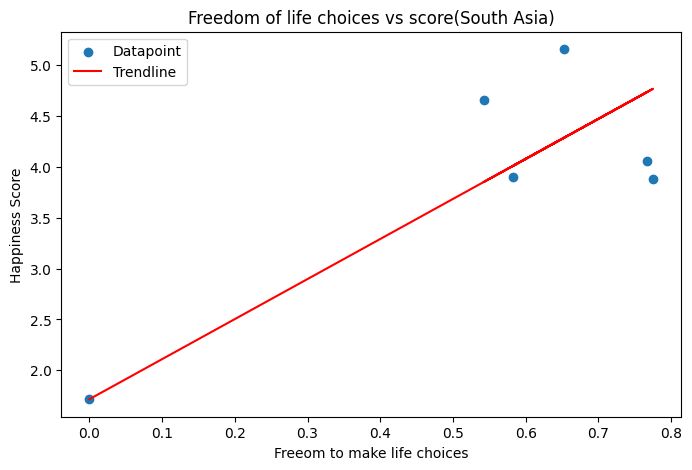

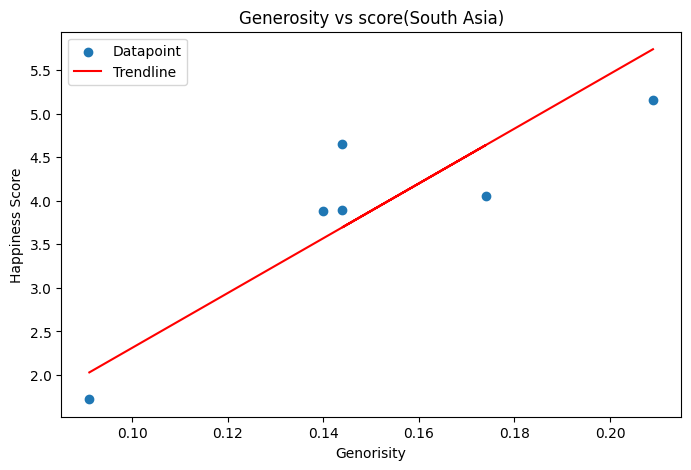

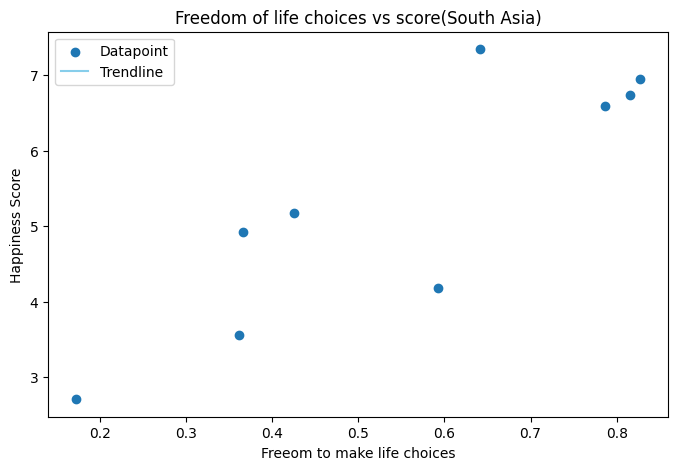

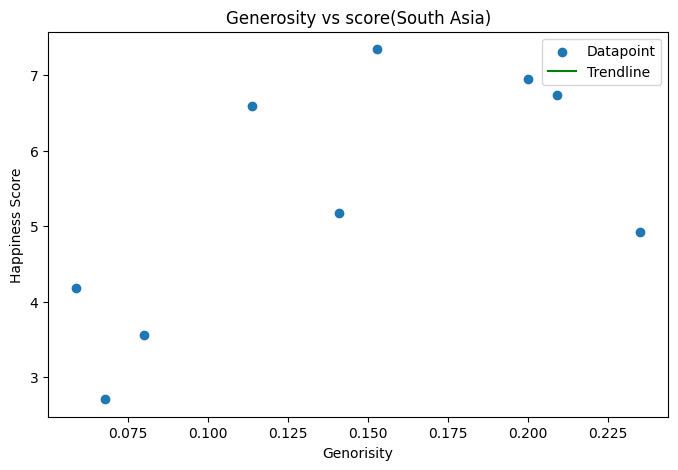

In [57]:
#South asia (Freedom to make life choices)
plt.figure(figsize=(8,5))
plt.scatter(newdf['Freedom to make life choices'], newdf[ 'score'],label='Datapoint')
x=newdf['Freedom to make life choices']
y=newdf['score']
slope=np.cov(x,y) [0,1]/np.var(x)
intercept = y.mean()-slope*x.mean()
plt.plot(x,slope*x+intercept, color='red',label='Trendline')
plt.xlabel("Freeom to make life choices")
plt.title("Freedom of life choices vs score(South Asia)")
plt.ylabel('Happiness Score')
plt.legend()
plt.show()
#Generosity
plt.figure(figsize=(8,5))
plt.scatter(newdf['Generosity'], newdf[ 'score'],label='Datapoint')
x=newdf['Generosity']
y=newdf['score']
slope=np.cov(x,y) [0,1]/np.var(x)
intercept = y.mean()-slope*x.mean()
plt.plot(x,slope*x+intercept, color='red',label='Trendline')
plt.xlabel("Genorisity")
plt.title("Generosity vs score(South Asia)")
plt.ylabel('Happiness Score')
plt.legend()
plt.show()
#middle east
plt.figure(figsize=(8,5))
plt.scatter(mec['Freedom to make life choices'], mec['score'],label='Datapoint')
x1=mec['Freedom to make life choices']
y1=mec['score']
slope = np.cov(x1,y1)[0,1] / np.var(x1)
intercept = y1.mean()-slope*x1.mean()
plt.plot(x1, (slope*x1+intercept) ,color='skyblue',label='Trendline')
plt.xlabel("Freeom to make life choices")
plt.title("Freedom of life choices vs score(South Asia)")
plt.ylabel('Happiness Score')
plt.legend()
plt.show()
#Generosity
plt.figure(figsize=(8,5))
plt.scatter(mec['Generosity'], mec[ 'score'],label='Datapoint')
x1=mec['Generosity']
y1=mec['score']
slope=np.cov(x1,y1) [0,1]/np.var(x1)
intercept = y1.mean()-slope*x1.mean()
plt.plot(x1,slope*x1+intercept, color='green',label='Trendline')
plt.xlabel("Genorisity")
plt.title("Generosity vs score(South Asia)")
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

Outlier Detection: • Identify outlier countries in both regions based on Score and GDP per Capita. • Plot these outliers and discuss their implications.

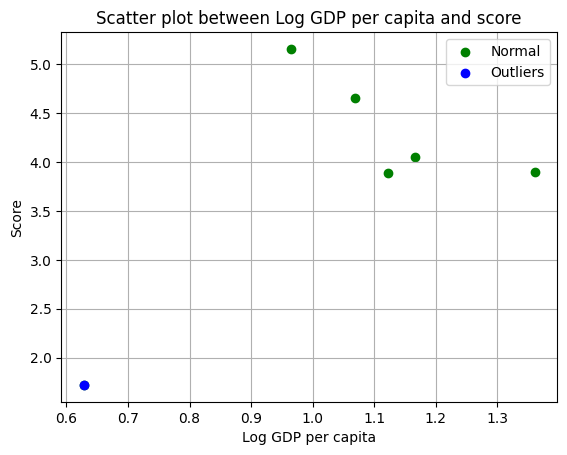

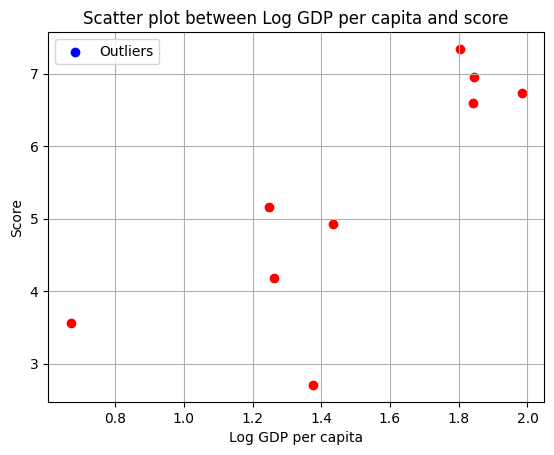

In [58]:
#PLOT
plt.scatter(newdf['Log GDP per capita'],newdf['score'],color='green',label='Normal')
plt.scatter(outliers['Log GDP per capita'],outliers['score'],color='blue',label='Outliers')
plt.title('Scatter plot between Log GDP per capita and score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()
#first and third quartile for score
Q1=mec['score'].quantile(0.25)
Q3=mec['score'].quantile(0.75)
#InterQuartile for score
IQR_S=Q3-Q1
#first and third quartile for GDP per capita
Q1_gdp=mec['Log GDP per capita'].quantile(0.25)
Q3_gdp=mec['Log GDP per capita'].quantile(0.75)
#Interquartile for GDP per capita
IQR_gdp=Q3_gdp-Q1_gdp
#to find outliers looking for data points that fall on bounds for score
lowerBoundScore=Q1-1.5*IQR_S
upperBoundScore=Q3+1.5*IQR_S
#to find outliers looking for data points that fall on bounds for GDP per capita
lowerBoundGDP=Q1_gdp-1.5*IQR_gdp
upperBoundGDP=Q3_gdp+1.5*IQR_gdp

#Identifying outliers
outliersOfScoreMe=mec[(mec['score']<lowerBoundScore) | (mec['score']>upperBoundScore)]
outliersOfGDPMe=mec[(mec['Log GDP per capita']<lowerBoundGDP) | (mec['Log GDP per capita']>upperBoundGDP)]
#Combining outliers
outliers=pd.concat([outliersOfScoreMe,outliersOfGDPMe]).drop_duplicates()

#PLOT
plt.scatter(mec['Log GDP per capita'],mec['score'],color='red')
plt.scatter(outliers['Log GDP per capita'],outliers['score'],color='blue',label='Outliers')
plt.title('Scatter plot between Log GDP per capita and score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In above scatter plot of Log GDP per capita and score,we can see that Afghanistan is a country having outlier.It has lowest data.
But when plotting but in middle east countries we dont have any outliers

Visualization: • Create boxplots comparing the distribution of Score between South Asia and the Middle East. • Interpret the key differences in distribution shapes, medians, and outliers.

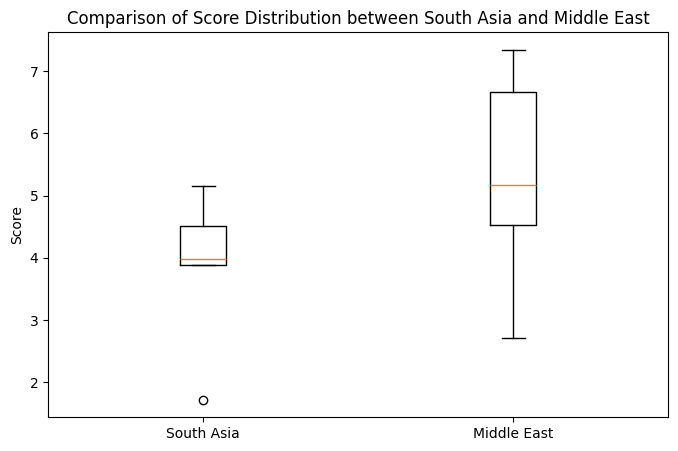

In [59]:
plt.figure(figsize=(8, 5))

plt.boxplot([newdf['score'],mec['score']], labels = ['South Asia','Middle East'])
plt.title('Comparison of Score Distribution between South Asia and Middle East')
plt.ylabel('Score')
plt.show()

In south asia region there is no lower whiskers.When we are creating a box plot ,outlier is defined at data point which is located outside the whiskers of box plot.from above box plot we cansee that south asian countries have a outliers whereas middle east doesnot have any outliers.Middle east countries have the longer box so the data are more dispersed.Fromabove